## Dataset

In [1]:
import numpy as np

In [2]:
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X**2) + 0.5 * (X**3) + np.random.normal(-3, 3, 20)

## Visualisasi Dataset

In [3]:
import matplotlib.pyplot as plt

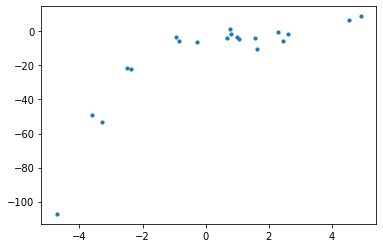

In [4]:
plt.scatter(X, y, s=10)
plt.show()

## Transforming X

In [5]:
X

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [6]:
X = X.reshape(-1, 1)
X

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

## Splitting Dataset: Training Set & Test Set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=1
)

## Training Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly_train = polynomial_features.fit_transform(X_train)

In [11]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

## Visualisasi Model

In [12]:
import operator

In [13]:
X_poly_vis = polynomial_features.fit_transform(X)
y_poly_pred = model.predict(X_poly_vis)

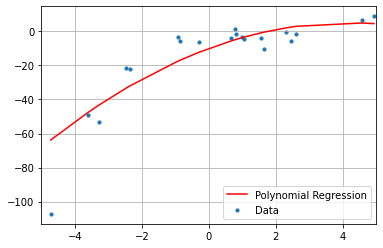

In [14]:
plt.scatter(X, y, label='Data', s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='r', label='Polynomial Regression')

plt.xlim(-5, 5)
plt.legend()
plt.grid()
plt.show()

## Evaluasi Model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X_poly_test = polynomial_features.fit_transform(X_test)
y_poly_pred = model.predict(X_poly_test)

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
r2 = r2_score(y_test, y_poly_pred)
print(rmse)
print(r2)

17.269734892112798
0.7521380175580118
